# JUPYTER NOTEBOOK FOR HOMEWORK 2 - question 2
Using logistic regression classifier to identify faces with happy or sad expressions

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from helper import y2indicator, getBinaryfer13Data, sigmoid, sigmoid_cost, error_rate, init_weight_and_bias, \
                    init_weight_and_bias_NN, ReLU, softmax, cost

np.random.seed(42)

# The Logistic regressor class

In [2]:

#Implement a logistic regression class to read in vectorized 48 x 48 images;
#  so that the dimension of the input is 2304.
#  The class includes function train (weight learning), forward (forward activations), 
#  predict (using current weight to make predictions) and score (or accuracy based on targets and predictions)
class LRClass(object):
    def __init__(self):
        self.W = None
        self.regW = None
        self.b = 0
        self.lam = 0.3

    def train(self, X, Y, step_size=10e-7, epochs=1000):
        # Validation data set extracted from the training data
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]
        N, D = X.shape
        
        #(i) Initialize the weights W to small random numbers (variance - zero); 
        #       also initialize the bias b to zero
        '*** Enter your contde below'
        self.W = np.random.randn(D) / np.sqrt(D)
        self.regW = np.random.randn(D)/np.sqrt(D)  # For regularization part
        self.lam = 0.05
        self.b = 0.0
        #For the given number of epochs selected, learn the weights 
        train_costs = []
        valid_costs = []
        best_validation_error = 1
        
        #(ii) Create a loop over the number of epochs specified. 
        for i in range(epochs):
                completed = str(((i+1)*100)//epochs) + "% completed"
                print('{}\r'.format(completed), end="")
                #(iii) Call the forward funcion to calculate P(Y|X)
                '*** Enter your code below'
                pY = self.forward(X)
                pYreg = self.forward_reg(X) # Regularizer
                pY_valid = self.forward(Xvalid)
                #(iv) Next, learn the weights via back-propagation, by performing 
                #   gradient descent using equations (1) and (2) from the HW text
                '*** Enter your code below'
                self.W = self.W - (step_size * np.dot( X.T, (pY-Y)))
                self.b = self.b - (step_size * np.sum(pY-Y))

                # Weight update with regularization (lambda = 0.5)
                jPenalty = self.lam * self.regW                 
                self.regW = self.regW - (step_size * (np.dot(X.T,(pYreg-Y)) + jPenalty))
                
                #(v) Using both the training and validation data, compute P(Y|X) using the 
                #       forward algo. Compute the sigmoid costs and append to array costs
                #       Check to set best_validation_error 
                '*** Enter your code below'
                
                
                train = sigmoid_cost(Y, pY)/len(Y)
                train_costs.append(train)
                valid = sigmoid_cost(Yvalid, pY_valid)/len(Yvalid)
                valid_costs.append(valid)
                if valid < best_validation_error:
                    best_validation_error = valid

        #(vi) Print your best validation error here
        plt.plot(range(epochs), train_costs)
        plt.plot(range(epochs), valid_costs)
        plt.legend(["Training cost","Validation Costs"])
        plt.show()
        print("best_validation_error:", best_validation_error)
        
        #(vii) Display the graph of the validation cost in your final report
    
    # Implement the forward algorithm
    def forward(self, X):
        '*** Enter your code below'
        linearModel = np.dot(X, self.W) + self.b
        ret = sigmoid(linearModel)
        return ret
    
    # Implement the prediction algorithm, calling forward
    def predict(self, X):
        '*** Enter your code below'
        yPred = self.forward(X)
        yPredClasses = [1 if i > 0.5 else 0 for i in yPred]
        return yPredClasses
        
    # Implement a method to compute accuracy or classification rate
    def score(self, X, Y):
        length = len(Y)
        count = 0
        yPredClasses = self.predict(X)
        for i in range(length):
            if yPredClasses[i] == Y[i]:
                count += 1
                
        return count/length
    
    def forward_reg(self, X):
        linearModel = np.dot(X, self.regW) + self.b
        ret = sigmoid(linearModel)
        return ret
    
    def predict_reg(self, X):
        yPred = self.forward_reg(X)
        yPredClasses = [1 if i > 0.5 else 0 for i in yPred]
        return yPredClasses
    
    def score_reg(self, X, Y):
        length = len(Y)
        count = 0
        yPredClasses = self.predict_reg(X)
        for i in range(length):
            if yPredClasses[i] == Y[i]:
                count += 1
                
        return count/length

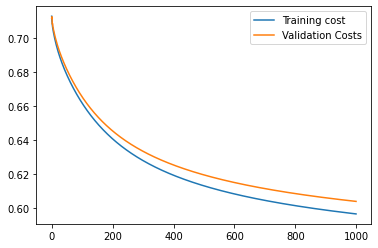

best_validation_error: 0.6040457268046957
Accuracy of test set is:  70.39999999999999


In [3]:
#Call your logistic regression class and train your object
X, Y = getBinaryfer13Data('fer3and4train.csv') 
lrObj = LRClass()
lrObj.train(X, Y, epochs = 1000)

#(viii) After successfully training, apply the learned model on the test dataset
testX, testY = getBinaryfer13Data('fer3and4test.csv')
print("Accuracy of test set is: ", lrObj.score(testX, testY)*100)


In [4]:
print("Accuracy after regularizing: ", lrObj.score_reg(testX, testY))

Accuracy after regularizing:  0.707
